<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%8E%89%E5%B1%B1%E9%8A%80%E8%A1%8CAI%E6%AF%94%E8%B3%BD_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import gc
import warnings 
warnings.simplefilter('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 中文map

In [0]:
中文map = {'bacno':'歸戶帳號','txkey':'交易序號','locdt':'授權日期','loctm':'授權時間','cano':'交易卡號',
         'contp':'交易類別','etymd':'交易型態','mchno':'特店代號','acqic':'收單行代碼','mcc':'MCC_CODE',
         'conam':'交易金額-台幣(經過轉換)','ecfg':'網路交易註記','insfg':'分期交易註記','iterm':'分期期數',
         'stocn':'消費地國別','scity':'消費城市','stscd':'狀態碼','ovrlt':'超額註記碼','flbmk':'Fallback註記',
         'hcefg':'支付型態','csmcu':'消費地幣別','flg_3dsmk':'3DS交易註記','fraud_ind':'盜刷註記'}

# Load data

In [3]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train_預處理完.csv",index_col=0)
train_fraud_ind = train['fraud_ind']
train_txkey = train['txkey']
print(train.shape)
train.head()

(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,fraud_ind
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056,0
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376,0
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434,0
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164,0
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004,0


In [4]:
test = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test_預處理完.csv",index_col=0)
test_txkey = test['txkey']
print(test.shape)
test.head()

(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,77950,457,59060,0,0,102,0,592489
1,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,79549,457,59060,0,0,102,0,592452
2,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,100,60355,457,59060,0,0,102,0,590212
3,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,100,60296,457,59060,0,0,102,0,590209
4,6862,162489,116168,16158,5,0,0,0,0,0,5,0,0,102,77933,457,59060,0,0,102,0,592488


In [5]:
full_data  = train.drop('fraud_ind',axis=1).append(test)
print('shape:',full_data.shape)
print('total_nan:',full_data.isnull().sum().sum())
full_data.head()

shape: (1943452, 22)
total_nan: 0


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004


# 定義特徵

In [6]:
features = full_data.drop(['txkey','locdt'],axis=1).columns.tolist()
print(len(features))
print(features)

20
['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk', 'hcefg', 'insfg', 'iterm', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd']


# kdeplot

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def kdeplotByGroup(df,x_col,y_col,group_value):
  g1 = df.loc[df[x_col].isin(group_value),y_col]#組內
  g2 = df.loc[~df[x_col].isin(group_value),y_col]#組外
  print(x_col,'IN_GROUP y_mean is:',round(g1.mean(),2))#組內平均
  print(x_col,'OUT_GROUP y_mean is:',round(g2.mean(),2))#組外平均
  sns.kdeplot(g1,label='IN_GROUP')
  sns.kdeplot(g2,label='OUT_GROUP')
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.legend()
  plt.show()

def kdeplotByValue(df,x_col,y_col):
  m = df[x_col].mean()
  g1 = df.loc[df[x_col]>m ,y_col]
  g2 = df.loc[df[x_col]<m ,y_col]
  sns.kdeplot(g1,label = x_col+'>AVG')
  sns.kdeplot(g2,label = x_col+'<AVG')
  print(x_col +' > '+ m + y_col +'s AVG:',round(np.mean(g1),2))
  print(x_col +' < '+ m + y_col +'s AVG:',round(np.mean(g2),2))
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.legend()
  plt.show()

stocn IN_GROUP y_mean is: 23264.05
stocn OUT_GROUP y_mean is: 18676.42


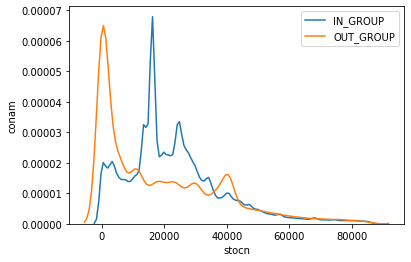

In [8]:
value = [0,20,34,41,55,68,72,75,81,83,87,89,102,106,107]
kdeplotByGroup(train,'stocn','conam',value)

# stscd = 0 通常不是盜刷

stscd IN_GROUP y_mean is: 0.01
stscd OUT_GROUP y_mean is: 0.3


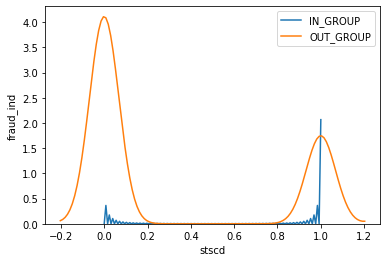

In [9]:
value = [0]
kdeplotByGroup(train,'stscd','fraud_ind',value)

# stscd = 2 有較高可能是盜刷

stscd IN_GROUP y_mean is: 0.31
stscd OUT_GROUP y_mean is: 0.01


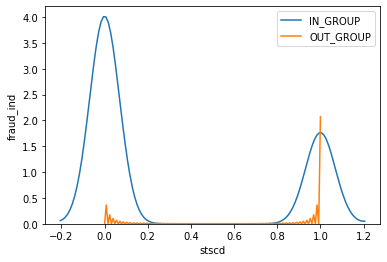

In [10]:
value = [2]
kdeplotByGroup(train,'stscd','fraud_ind',value)

# mchno_stscd_2_norm_count 的靈感

In [11]:
pv = train.pivot_table(index='mchno',columns='stscd',values='fraud_ind',aggfunc='mean',margins=True)
res = pv.loc[pv[2] == np.max(pv[2]),:]
res

stscd,0,1,2,3,4,All
mchno,,,,,,
276,NaN,NaN,1.0,NaN,NaN,1.0
292,NaN,NaN,1.0,NaN,NaN,1.0
298,NaN,NaN,1.0,NaN,NaN,1.0
322,NaN,NaN,1.0,NaN,NaN,1.0
548,1.0,NaN,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...
101824,NaN,NaN,1.0,NaN,NaN,1.0
102582,NaN,NaN,1.0,NaN,NaN,1.0
102659,0.0,NaN,1.0,NaN,NaN,0.5


In [0]:
risk_mchno = list(res.index)

In [13]:
full_data['risk_mchno'] = 0
full_data.loc[full_data['mchno'].isin(risk_mchno),'risk_mchno'] = 1
full_data['risk_mchno'].value_counts()

0    1936610
1       6842
Name: risk_mchno, dtype: int64

# Function for Numeric Aggregations

In [0]:
def agg_function(df,group_var,features):
    agg = df[features+[group_var]].groupby(group_var).agg(["nunique"]).reset_index()
    columns = [group_var]
    for var in agg.columns.levels[0]:
      if var != group_var:
        for stat in agg.columns.levels[1][:-1]:
          columns.append('%s_%s_%s' % (group_var,var,stat))
    agg.columns = columns
    return agg

# Function to Handle Categorical Variables

In [0]:
def count_categorical(df, group_var,categorical_features):
    categorical = pd.get_dummies(df[categorical_features],columns=categorical_features)
    categorical[group_var] = df[group_var]
    categorical = categorical.groupby(group_var).agg(['mean'])
    column_names = []
    for var in categorical.columns.levels[0]:
      for stat in ['norm_count']:
        column_names.append('%s_%s_%s' % (group_var, var, stat))
    categorical.columns = column_names
    return categorical

# mchno

In [16]:
id_col = 'mchno' 
norm_count_col = ['stscd']
full_data = full_data.merge(count_categorical(full_data,id_col,norm_count_col),on=id_col,how='left')
gc.collect()

3102

# acqic

In [0]:
id_col = 'acqic' 
norm_count_col = ['ecfg']
full_data = full_data.merge(count_categorical(full_data,id_col,norm_count_col),on=id_col,how='left')

In [18]:
gc.collect()

0

# check

In [19]:
print(full_data.shape)
print(full_data.isnull().sum().sum())
full_data.head()

(1943452, 30)
0


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,risk_mchno,mchno_stscd_0_norm_count,mchno_stscd_1_norm_count,mchno_stscd_2_norm_count,mchno_stscd_3_norm_count,mchno_stscd_4_norm_count,acqic_ecfg_0_norm_count,acqic_ecfg_1_norm_count
0,6862,112785,37846,16158,5,0,0,0,0,0,5,0,0,33,61954,457,59034,0,0,102,0,516056,0,0.998956,0.000000,0.001044,0.0,0,1.000000,0.000000
1,0,133951,45476,13693,5,0,0,2,0,0,0,0,0,9,38216,451,0,0,5795,102,0,4376,0,0.997536,0.002448,0.000016,0.0,0,1.000000,0.000000
2,6862,15350,187354,16158,5,0,0,0,0,0,5,0,0,6,54640,457,59034,0,0,102,0,483434,0,0.998956,0.000000,0.001044,0.0,0,1.000000,0.000000
3,6697,156492,29812,40413,5,62,0,5,0,0,5,0,0,5,62128,247,50185,0,3267,102,0,1407164,0,1.000000,0.000000,0.000000,0.0,0,0.764562,0.235438
4,5959,105534,80881,25962,5,62,0,4,0,0,5,0,0,6,65231,263,93290,0,5795,102,0,1051004,0,1.000000,0.000000,0.000000,0.0,0,0.916687,0.083313


# 拆回train and test

In [20]:
train = full_data.loc[full_data['txkey'].isin(train_txkey),:]
train['fraud_ind'] = train_fraud_ind
print(train.shape)

test = full_data.loc[full_data['txkey'].isin(test_txkey),:]
print(test.shape)

del full_data
gc.collect()

(1521787, 31)
(421665, 30)


11

# Correlation

In [0]:
def target_corrs(df,feats):
  corrs = {} 
  for col in feats:
    corr = df['fraud_ind'].corr(df[col])
    corrs[col] = abs(corr)
  return pd.DataFrame(corrs,index=['corr_score']).T.sort_values(by='corr_score',ascending=False)

# 原始特徵corr

In [22]:
old_corrs = target_corrs(train,features)
old_corrs.head(10)

,corr_score
stscd,0.279225
ecfg,0.161701
stocn,0.161405
acqic,0.083764
etymd,0.067743
loctm,0.041972
scity,0.028736
hcefg,0.026210
contp,0.023248
conam,0.022302


# 新特徵corr

In [23]:
new_feats = list(set(train.drop(['fraud_ind','txkey'],axis=1).columns)^set(features))
new_corrs = target_corrs(train,new_feats)
new_corrs.head(10)

,corr_score
mchno_stscd_2_norm_count,0.435368
mchno_stscd_0_norm_count,0.431845
acqic_ecfg_0_norm_count,0.222677
acqic_ecfg_1_norm_count,0.222677
risk_mchno,0.080574
locdt,0.011773
mchno_stscd_1_norm_count,0.006734
mchno_stscd_3_norm_count,0.001179
mchno_stscd_4_norm_count,0.000422


# 篩選新特徵

In [0]:
old_feat_num = len(features)
new_feat_num = 5

old_feat = list(old_corrs.head(old_feat_num).index)
new_feat = list(new_corrs.head(new_feat_num).index)

select_feats =  old_feat + new_feat 
train = train[select_feats+['txkey']+['fraud_ind']]
test = test[select_feats+['txkey']]

# 處裡共線性問題

In [0]:
corrs = abs(train.corr())
threshold = 0.8
above_threshold_vars = {}
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [26]:
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []
for key, value in above_threshold_vars.items():
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))
print(cols_to_remove_pair)
print(cols_to_remove)

Number of columns to remove:  3
['insfg', 'mchno_stscd_2_norm_count', 'acqic_ecfg_0_norm_count']
['iterm', 'acqic_ecfg_1_norm_count', 'mchno_stscd_0_norm_count']


In [0]:
train = train.drop(cols_to_remove,axis=1)
test = test.drop(cols_to_remove,axis=1)

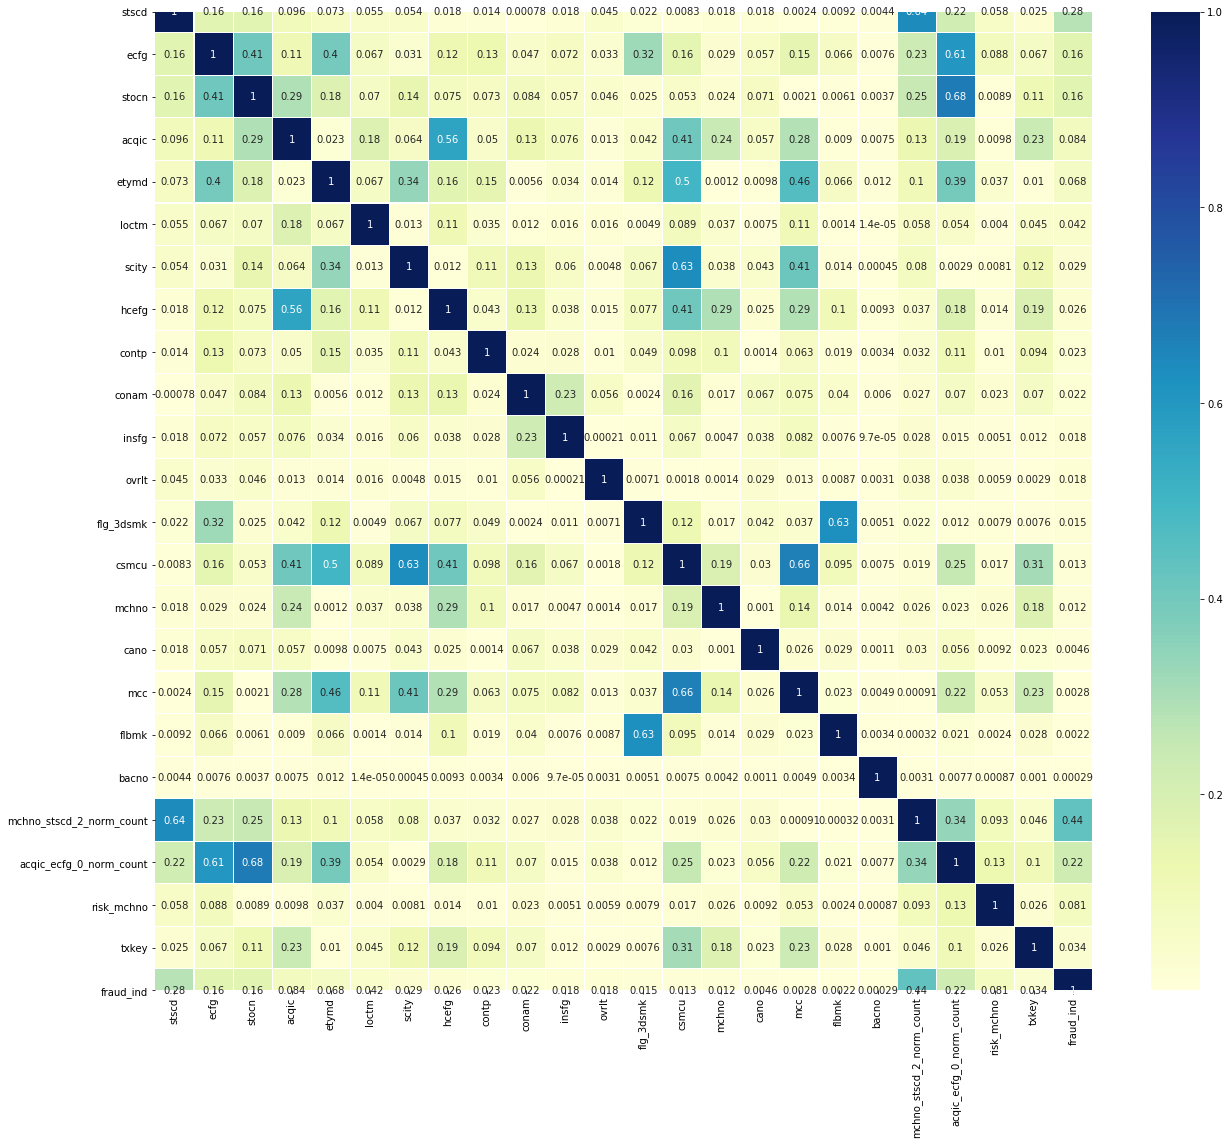

In [28]:
fig = plt.figure(figsize=(21,18))
sns.heatmap(abs(train.corr()),annot=True,linewidths=0.1,cmap='YlGnBu')

# check data

In [29]:
print(train.shape)
print(train.isnull().sum().sum())
train.head()

(1521787, 24)
0


,stscd,ecfg,stocn,acqic,etymd,loctm,scity,hcefg,contp,conam,insfg,ovrlt,flg_3dsmk,csmcu,mchno,cano,mcc,flbmk,bacno,mchno_stscd_2_norm_count,acqic_ecfg_0_norm_count,risk_mchno,txkey,fraud_ind
0,0,0,102,6862,0,61954,0,5,5,16158,0,0,0,0,59034,37846,457,0,112785,0.001044,1.000000,0,516056,0
1,0,0,102,0,2,38216,5795,0,5,13693,0,0,0,0,0,45476,451,0,133951,0.000016,1.000000,0,4376,0
2,0,0,102,6862,0,54640,0,5,5,16158,0,0,0,0,59034,187354,457,0,15350,0.001044,1.000000,0,483434,0
3,0,0,102,6697,5,62128,3267,5,5,40413,0,0,0,62,50185,29812,247,0,156492,0.000000,0.764562,0,1407164,0
4,0,0,102,5959,4,65231,5795,5,5,25962,0,0,0,62,93290,80881,263,0,105534,0.000000,0.916687,0,1051004,0


In [30]:
print(test.shape)
print(test.isnull().sum().sum())
test.head()

(421665, 23)
0


,stscd,ecfg,stocn,acqic,etymd,loctm,scity,hcefg,contp,conam,insfg,ovrlt,flg_3dsmk,csmcu,mchno,cano,mcc,flbmk,bacno,mchno_stscd_2_norm_count,acqic_ecfg_0_norm_count,risk_mchno,txkey
1521787,0,0,102,6862,0,77950,0,5,5,16158,0,0,0,0,59060,116168,457,0,162489,0.00193,1.0,0,592489
1521788,0,0,102,6862,0,79549,0,5,5,16158,0,0,0,0,59060,116168,457,0,162489,0.00193,1.0,0,592452
1521789,0,0,102,6862,0,60355,0,5,5,16158,0,0,0,0,59060,116168,457,0,162489,0.00193,1.0,0,590212
1521790,0,0,102,6862,0,60296,0,5,5,16158,0,0,0,0,59060,116168,457,0,162489,0.00193,1.0,0,590209
1521791,0,0,102,6862,0,77933,0,5,5,16158,0,0,0,0,59060,116168,457,0,162489,0.00193,1.0,0,592488


# save

In [31]:
train.to_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train_特徵工程完.csv")
test.to_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test_特徵工程完.csv")
print('save done!')

save done!
